In [5]:
%matplotlib inline
from scipy.special import ellipk, ellipe, ellipkm1
from numpy import pi, sqrt, linspace
from pylab import plot, xlabel, ylabel, suptitle, legend, show

uo = 4E-7*pi     # Permeability constant - units of H/m
Bo = lambda i, a, u=uo: i*u/2./a    # Central field = f(current, loop radius, perm. constant)
al = lambda r, a: r/a               # Alpha = f(radius of measurement point, radius of loop)
be = lambda x, a: x/a               # Beta = f(axial distance to meas. point, radius of loop)
ga = lambda x, r: x/r               # Gamma = f(axial distance, radius to meas. point)
Q = lambda r, x, a: (1 + al(r,a))**2 + be(x,a)**2   # Q = f(radius, distance to meas. point, loop radius)
k = lambda r, x, a: sqrt(4*al(r,a)/Q(r,x,a))       # k = f(radius, distance to meas. point, loop radius)
K = lambda k: ellipk(k**2.0)          # Elliptic integral, first kind, as a function of k
E = lambda k: ellipe(k**2.0)          # Elliptic integral, second kind, as a function of k

# On-Axis field = f(current and radius of loop, x of measurement point)
def Baxial(i, a, x, u=uo):
    if a == 0:
        if x == 0:
            return NaN
        else:
            return 0.0
    else:
        return (u*i*a**2)/2.0/(a**2 + x**2)**(1.5)

# Axial field component = f(current and radius of loop, r and x of meas. point)
def Bx(i, a, x, r):
    if r == 0:
        if x == 0:
            return Bo(i,a)         # central field
        else:
            return Baxial(i,a,x)   # axial field
    else:                          # axial component, any location
        return Bo(i,a)*\
            (E(k(r,x,a))*((1.0-al(r,a)**2-be(x,a)**2)/(Q(r,x,a)-4*al(r,a))) + K(k(r,x,a)))\
            /pi/sqrt(Q(r,x,a))
        
# Radial field component = f(current and radius of loop, r and x of meas. point)
def Br(i, a, x, r):
    if r == 0:
        return 0                   # no radial component on axis!
    else:                          # radial component, any location other than axis.
        return Bo(i,a)*ga(x,r)*\
            (E(k(r,x,a))*((1.0+al(r,a)**2+be(x,a)**2)/(Q(r,x,a)-4*al(r,a))) - K(k(r,x,a)))\
            /pi/sqrt(Q(r,x,a))

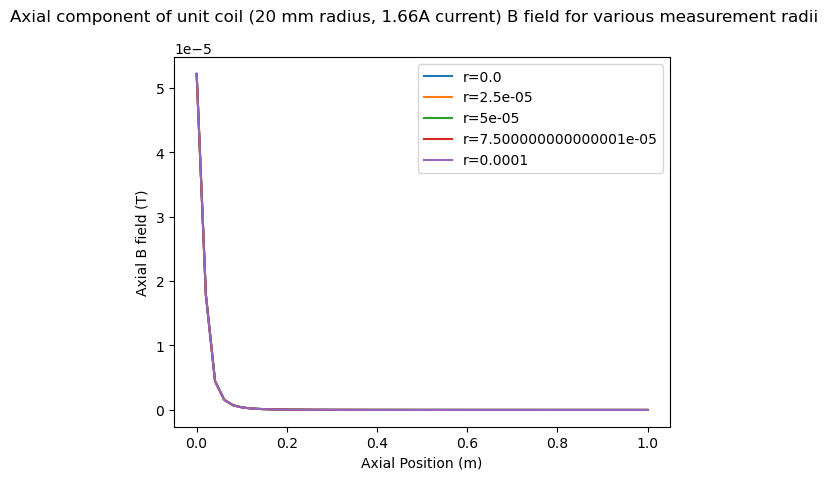

In [3]:
axiallimit = 1 # meters from center
radiallimit = 0.0001 # maximum radius to investigate
curveqty = 5
X = linspace(0,axiallimit)
R = linspace(0, radiallimit, curveqty)
[plot(X, [Bx(1.66,0.02,x,r) for x in X], label="r={0}".format(r)) for r in R]
xlabel("Axial Position (m)")
ylabel("Axial B field (T)")
suptitle("Axial component of unit coil (20 mm radius, 1.66A current) B field for various measurement radii")
legend()
show()

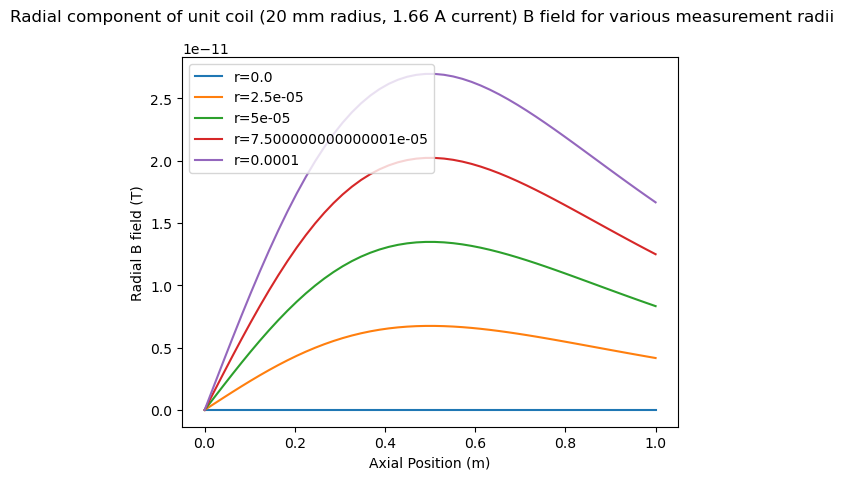

In [4]:
[plot(X, [Br(1,1,x,r) for x in X], label="r={0}".format(r)) for r in R]
xlabel("Axial Position (m)")
ylabel("Radial B field (T)")
suptitle("Radial component of unit coil (20 mm radius, 1.66 A current) B field for various measurement radii")
legend()
show()

In [21]:
def BxCoil(i,x,r,loops, d, w, startingr):
    #i-current through loops
    #x-distance along axis
    #r-radial distance off of axis
    #loops-number of loops in spiral coil
    #d-distance between loops
    #w-width of copper trace
    #startingr-radius of first loop
    BxTotal=0
    for ii in range(1,loops+1):
        loopr = startingr+d+w/2+(ii-1)*(d+w)
        BxTotal=BxTotal+Bx(i,loopr,x,r)*10000
    return BxTotal

def BrCoil(i,x,r,loops, d, w, startingr):
    #i-current through loops
    #x-distance along axis
    #r-radial distance off of axis
    #loops-number of loops in spiral coil
    #d-distance between loops
    #w-width of copper trace
    #startingr-radius of first loop
    BrTotal=0
    for ii in range(1,loops+1):
        loopr = startingr+d+w/2+(ii-1)*(d+w)
        BrTotal=BrTotal+Br(i,loopr,x,r)*10000
    return BrTotal


print(BxCoil(0.9,0.002,0.00002,20,0.00012,0.001,0.002),BrCoil(0.9,0.002,0.00002,20,0.00012,0.001,0.002))

10.194464892095652 0.015560812069032403
